<a href="https://colab.research.google.com/github/LayanaSingh/CodSoft/blob/main/Movie_Rating_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Rating Prediction With Python**



Aim: To analyze the data by understadning the recent trends of the movies in the indian cinema


In [56]:
# import the libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

import warnings
warnings.filterwarnings("ignore")

In [57]:
#loading the data
df=pd.read_csv('/content/IMDb Movies India.csv(1).zip',encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [59]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [60]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [61]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [62]:
df.duplicated().sum()

6

In [63]:
df=df.drop_duplicates()

In [64]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

genre

In [65]:
 # Create a new DataFrame for the genre data
genre_df = df[['Genre']].copy()


genre_df.dropna(subset=['Genre'], inplace=True)

# Combine all genres into a single string, separated by commas
all_genres = ",".join(genre_df['Genre'].tolist())


# Split the combined string to get a list of all genres
genre_list = all_genres.split(",")

# Use a set to collect unique genres after stripping spaces
unique_genres = set(genre.strip() for genre in genre_list)

# Convert the set of unique genres back to a list
unique_genres = list(unique_genres)

# Print the unique genre names
print(unique_genres)




df[['Genre1','Genre2','Genre3']]=df['Genre'].str.split(expand=True)

['Drama', 'War', 'Thriller', 'Comedy', 'Crime', 'Animation', 'Musical', 'Adventure', 'Action', 'Mystery', 'Biography', 'Reality-TV', 'Documentary', 'News', 'Fantasy', 'Horror', 'Western', 'Sci-Fi', 'Sport', 'History', 'Romance', 'Music', 'Short', 'Family']


In [66]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Drama,",Musical,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Comedy,",Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,None,None
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,"Action,",Drama,None
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,None,None
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,Action,None,None


In [67]:
df['Genre1']=df['Genre1'].str.strip(',')

In [68]:
df['Genre2']=df['Genre2'].str.strip(',')

In [69]:
# Remove rows with missing values in the 'Rating' column
df= df.dropna(subset=['Rating'])

#Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [70]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
Genre1       102
Genre2      2813
Genre3      5107
dtype: int64

In [71]:
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [72]:

df['Year'] = df['Year'].str.replace(r'\D', '', regex=True).astype(int)

In [73]:
df['Duration'] = df['Duration'].str.replace(r'\D', '', regex=True).astype(float)

df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(int)

duration = df['Duration'].median()

# Fill missing values in the 'Duration' column with the median value
df['Duration'].fillna(duration, inplace=True)

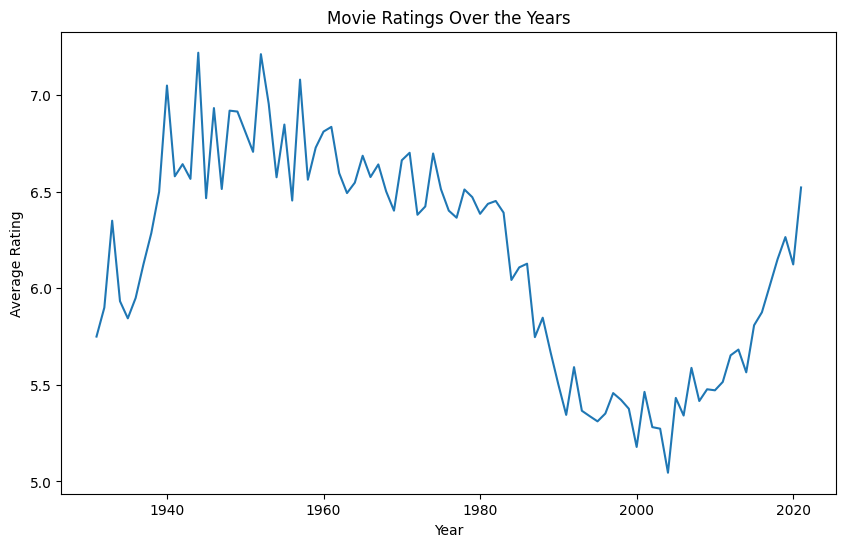

In [74]:
# Make sure 'Year' and 'Rating' columns are in the correct data types (int and float)
df['Year'] = df['Year'].astype(int)
df['Rating'] = df['Rating'].astype(float)

# Group data by year and calculate the mean rating for each year
ratings_by_year = df.groupby('Year')['Rating'].mean()

# Create a time series plot for movie ratings over the years
plt.figure(figsize=(10, 6))
ratings_by_year.plot()
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


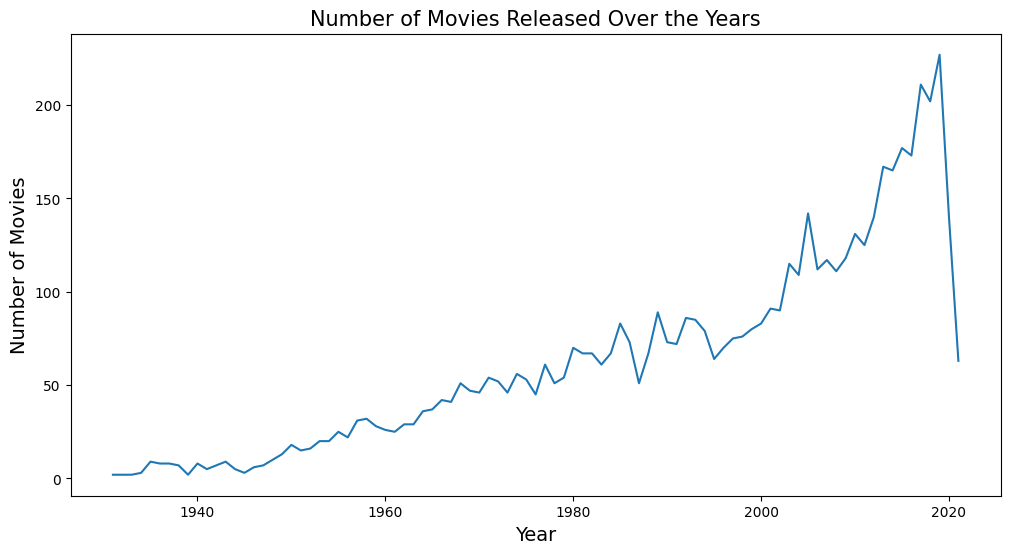

In [75]:
# Make sure the 'Year' column is in the correct data type (int)
df['Year'] = df['Year'].astype(int)

# Group data by year and calculate the count of movies for each year
movies_by_year = df.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released Over the Years', fontsize = 15)
plt.xlabel('Year', fontsize =14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.show()

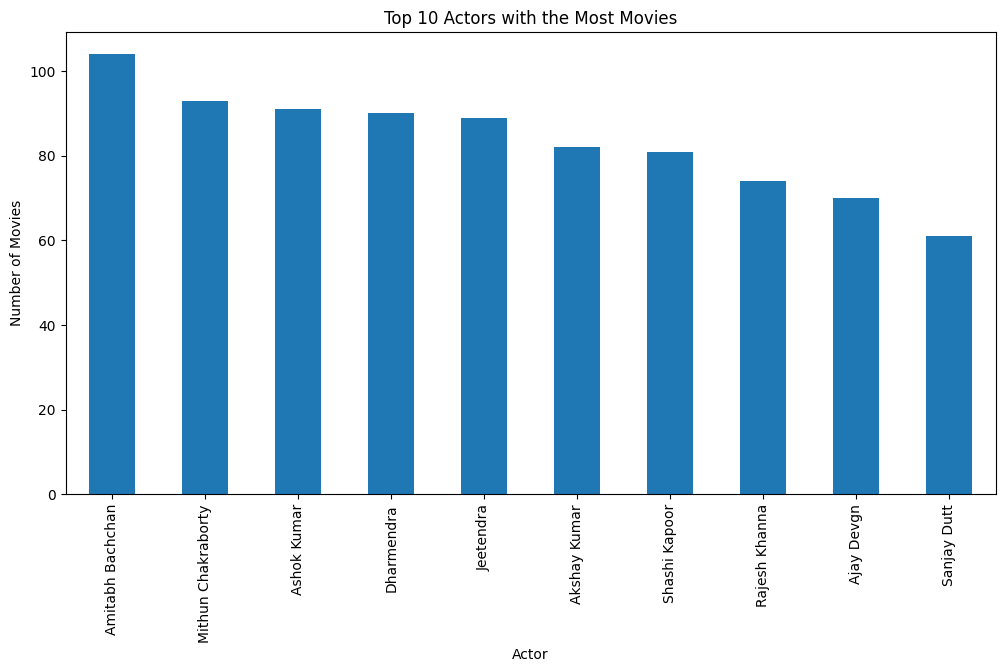

In [76]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each actor, sort in descending order, and select the top 10
top_actors = df['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 actors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()

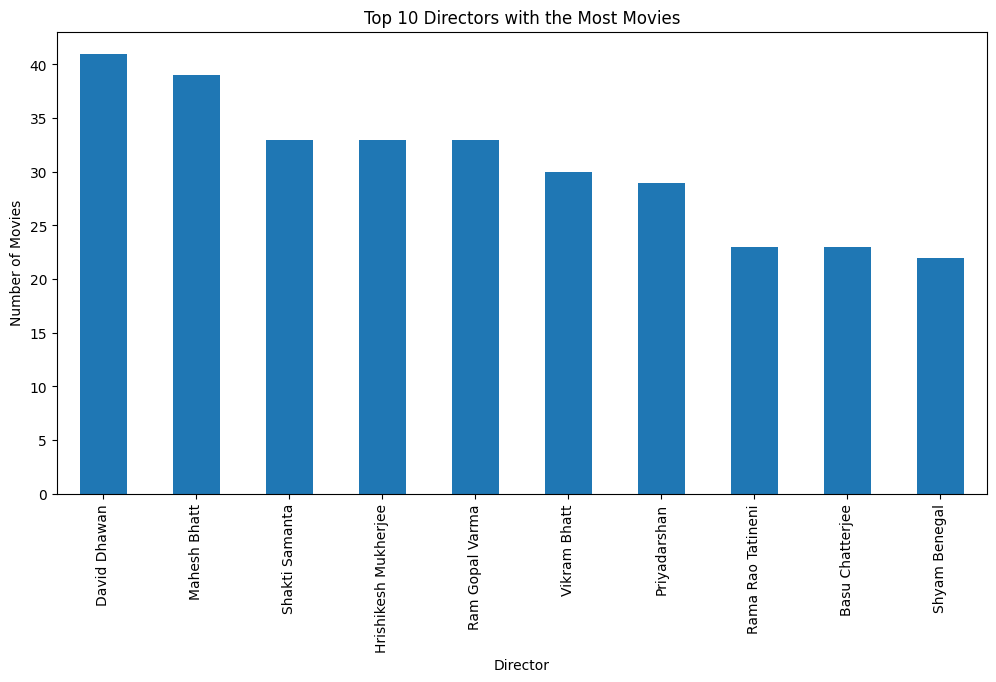

In [77]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each director, sort in descending order, and select the top 10
top_directors = df['Director'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 directors with the most movies
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate director names for better visibility
plt.show()

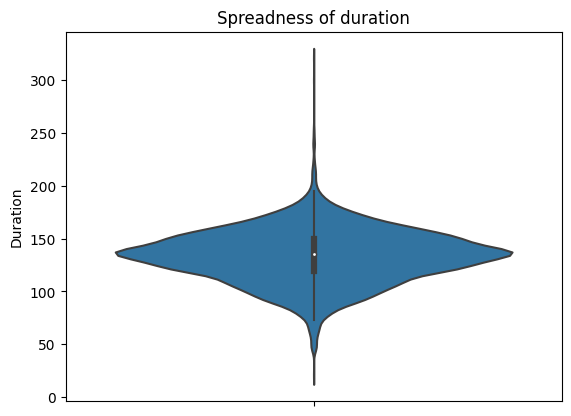

In [78]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

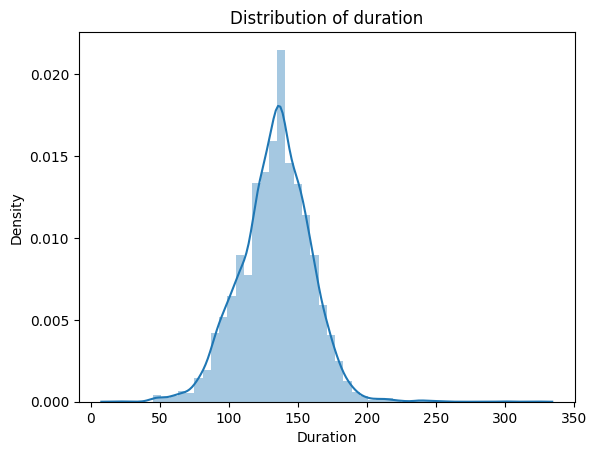

In [79]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

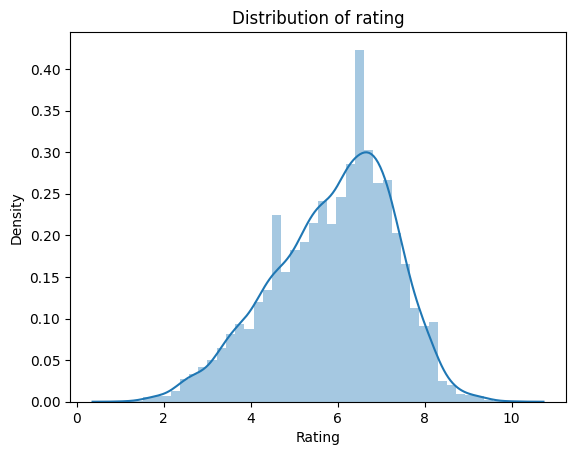

In [80]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()

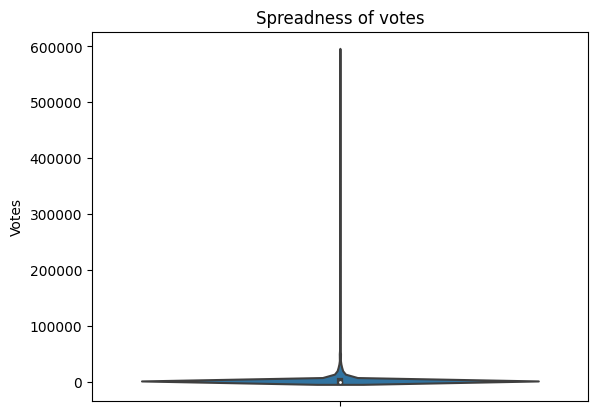

In [81]:
sns.violinplot(y=df['Votes'])
plt.title('Spreadness of votes')
plt.show()

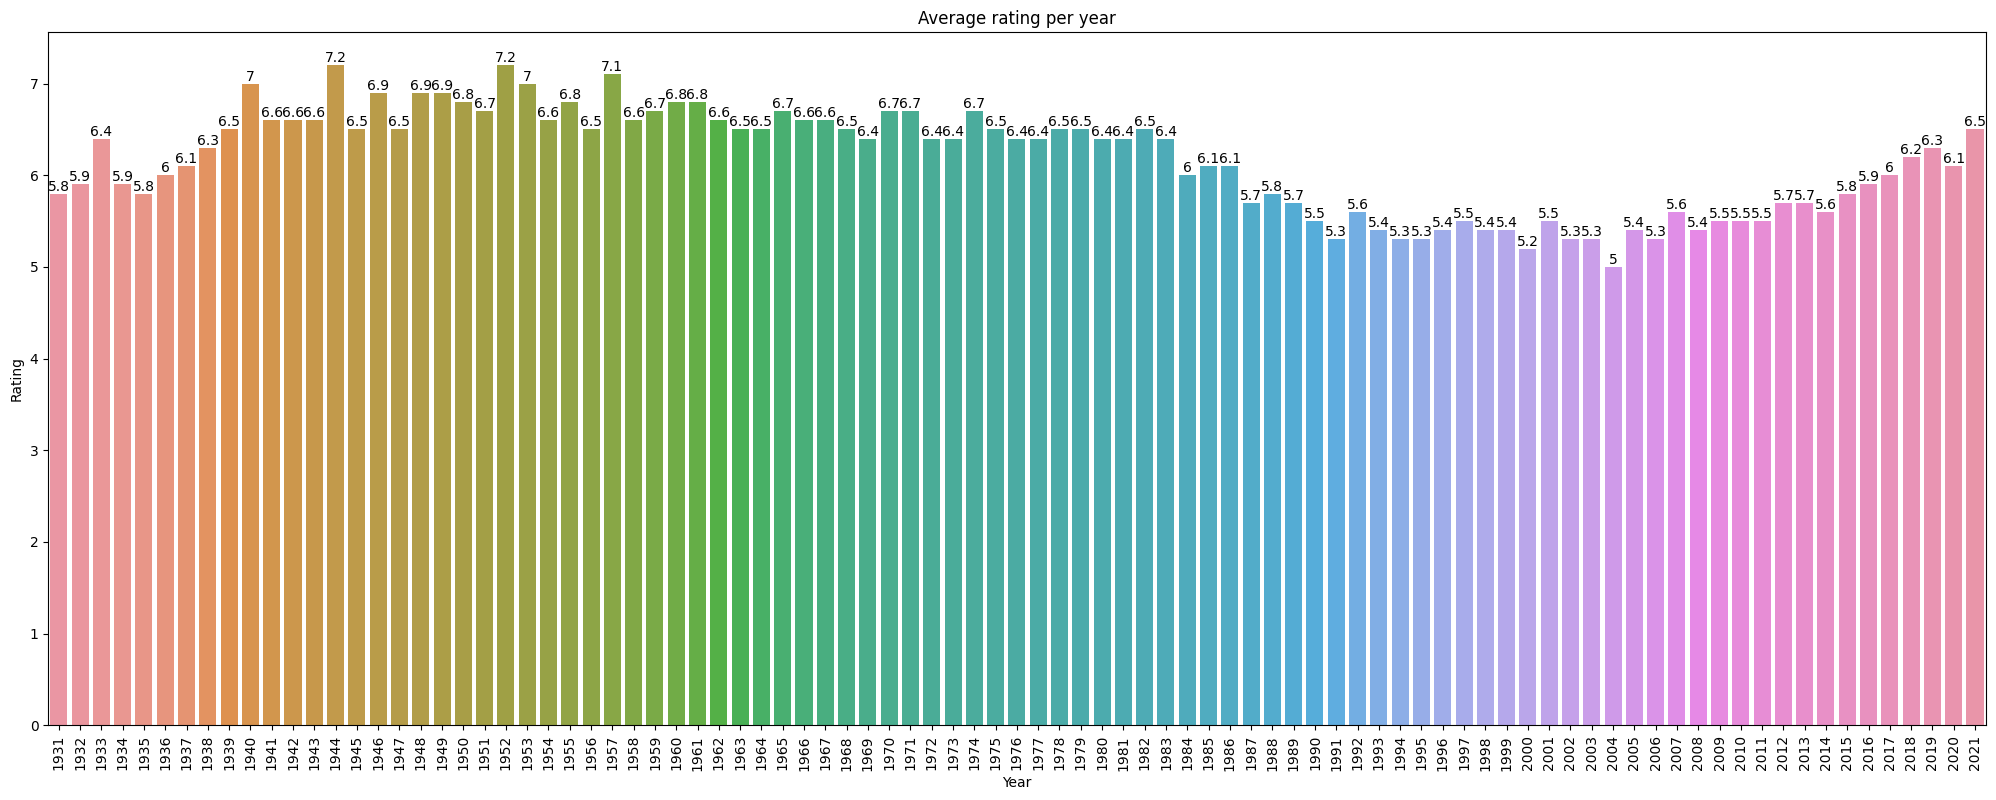

In [82]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

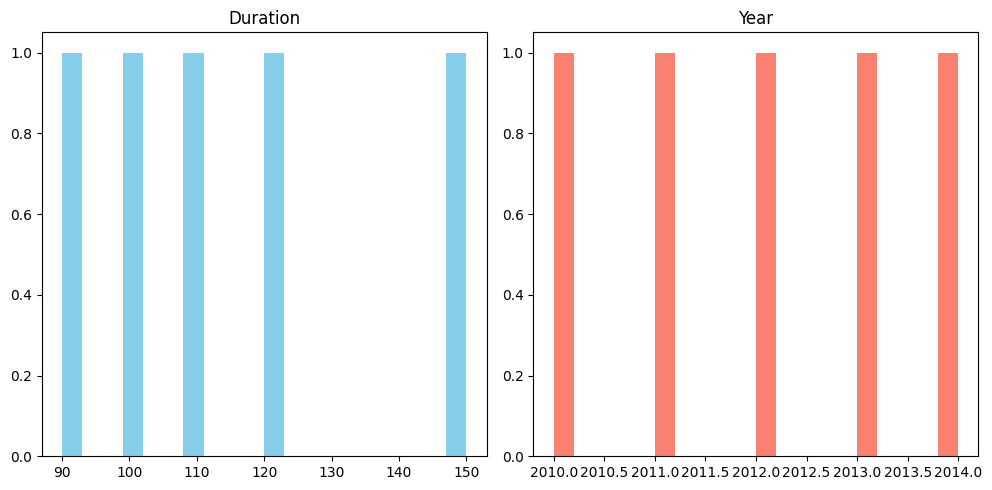

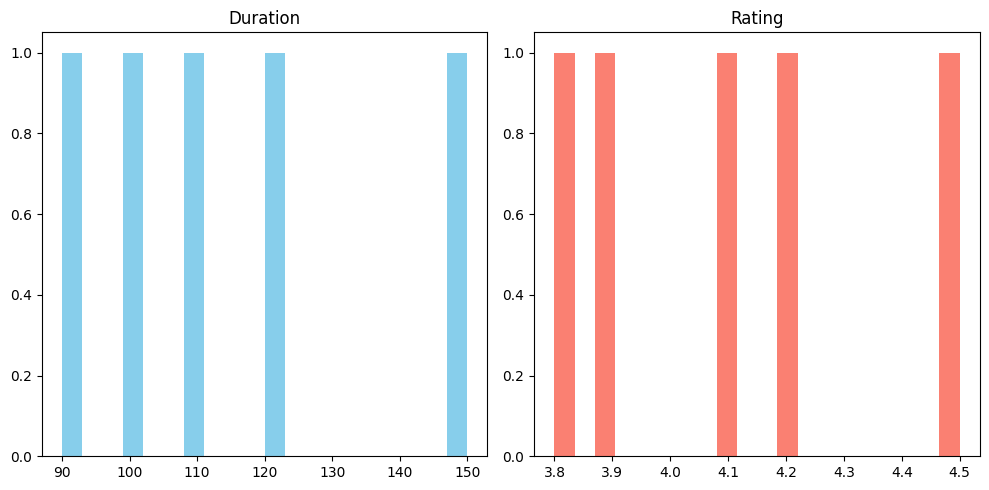

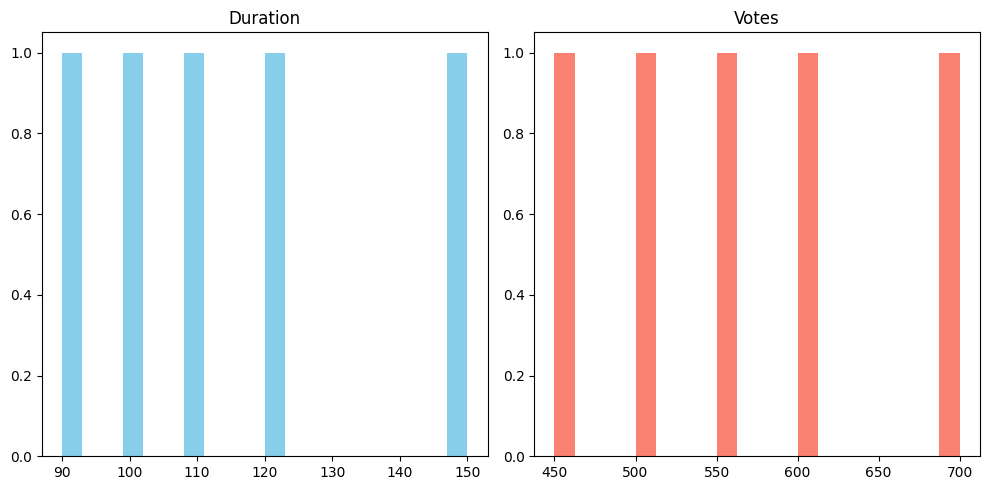

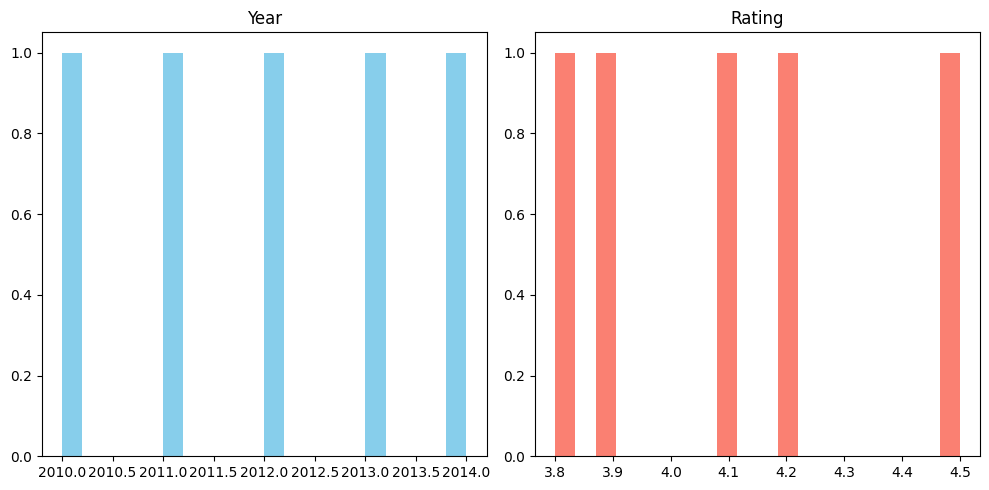

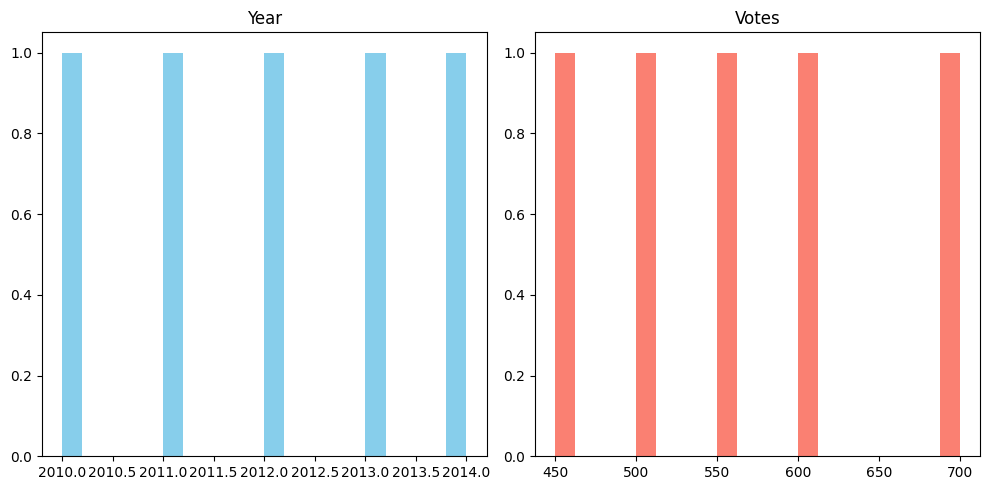

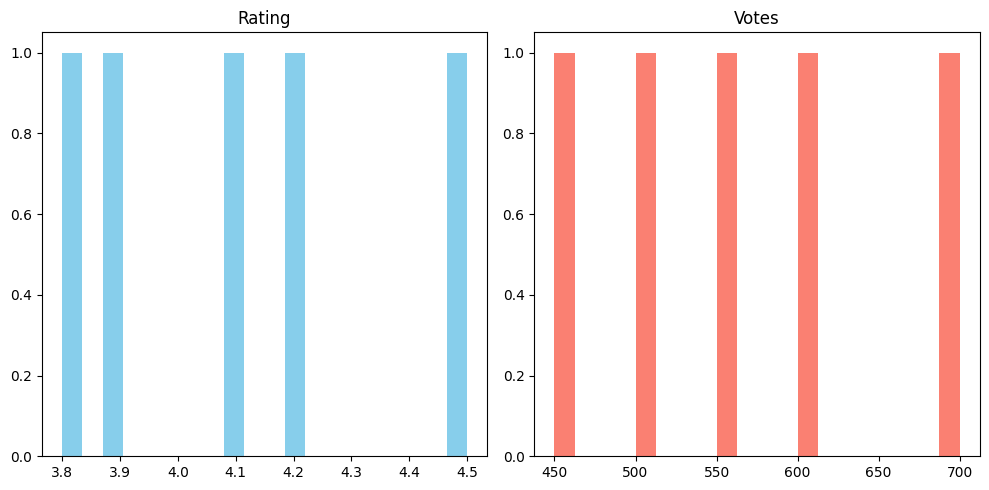

In [83]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_histograms(data, col1, col2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data[col1], bins=20, color='skyblue')
    plt.title(col1)

    plt.subplot(1, 2, 2)
    plt.hist(data[col2], bins=20, color='salmon')
    plt.title(col2)

    plt.tight_layout()
    plt.show()
# Assuming 'data' is your dataset or DataFrame
data = {
    "Duration": [100, 150, 120, 90, 110],
    "Year": [2010, 2011, 2012, 2013, 2014],
    "Rating": [4.5, 3.8, 4.2, 3.9, 4.1],
    "Votes": [500, 600, 450, 700, 550]
}

columns = ["Duration", "Year", "Rating", "Votes"]
comb = combinations(columns, 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    plot_histograms(data, col[0], col[1])

In [84]:
num_columns=df.select_dtypes(include=('float','int64')).columns.tolist()
num_columns

['Year', 'Duration', 'Rating', 'Votes']

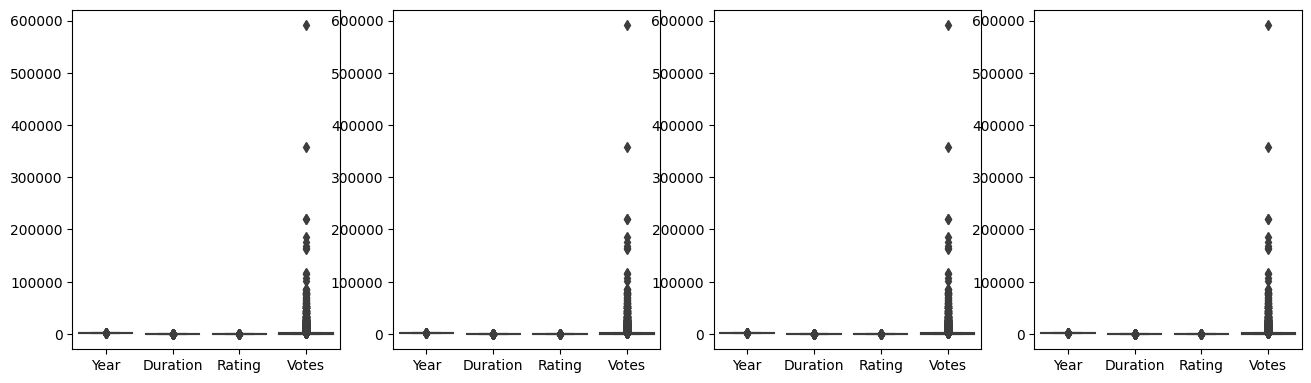

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = df.select_dtypes(include=('float', 'int64')).columns.tolist()

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(df[num_columns])

plt.show()

In [86]:
for i in num_columns:
  def drop_outliers(df,field_name):
    iqr= 1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr + np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)- iqr)].index,inplace=True)
  drop_outliers(df,i)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [89]:
df.drop('Genre3',axis=1,inplace=True)

In [90]:
df.drop('Name',axis=1,inplace=True)
df.drop('Genre',axis=1,inplace=True)

In [91]:
datamodel = df[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [92]:
df.dtypes

Year          int64
Duration    float64
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Genre1       object
Genre2       object
dtype: object

In [93]:
# feature Engineering
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating

In [94]:
#splitting data into trainning n testing
X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [95]:
num_column=df.select_dtypes(include=('object')).columns.tolist()
num_column

['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2']

In [96]:
from sklearn.preprocessing import LabelEncoder

# Assuming x_train is your DataFrame and num_column is a list of column names
for i in num_column:
    if i in X_train.columns:
        label_encoder = LabelEncoder()
        X_train[i] = label_encoder.fit_transform(X_train[i])
    else:
        print(f"Column '{i}' not found in X_train.")

    if i in X_test.columns:
        label_encoder = LabelEncoder()
        X_test[i] = label_encoder.fit_transform(X_test[i])
    else:
        print(f"Column '{i}' not found in X_test.")


Column 'Director' not found in X_train.
Column 'Director' not found in X_test.
Column 'Actor 1' not found in X_train.
Column 'Actor 1' not found in X_test.
Column 'Actor 2' not found in X_train.
Column 'Actor 2' not found in X_test.
Column 'Actor 3' not found in X_train.
Column 'Actor 3' not found in X_test.
Column 'Genre1' not found in X_train.
Column 'Genre1' not found in X_test.
Column 'Genre2' not found in X_train.
Column 'Genre2' not found in X_test.


In [97]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Assuming x_train is your DataFrame and num_column is a list of column names
for i in num_column:
    if i in X_train.columns:
        label_encoder = LabelEncoder()
        X_train[i] = label_encoder.fit_transform(X_train[i])
    else:
        print(f"Column '{i}' not found in X_train.")

    if i in X_test.columns:
        label_encoder = LabelEncoder()
        X_test[i] = label_encoder.fit_transform(X_test[i])
    else:
        print(f"Column '{i}' not found in X_test.")


X_train columns: Index(['Year', 'Votes', 'Duration', 'Director_encoded', 'Actor1_encoded',
       'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')
X_test columns: Index(['Year', 'Votes', 'Duration', 'Director_encoded', 'Actor1_encoded',
       'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')
Column 'Director' not found in X_train.
Column 'Director' not found in X_test.
Column 'Actor 1' not found in X_train.
Column 'Actor 1' not found in X_test.
Column 'Actor 2' not found in X_train.
Column 'Actor 2' not found in X_test.
Column 'Actor 3' not found in X_train.
Column 'Actor 3' not found in X_test.
Column 'Genre1' not found in X_train.
Column 'Genre1' not found in X_test.
Column 'Genre2' not found in X_train.
Column 'Genre2' not found in X_test.


In [98]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()


Logistic Regression Model Performance: 
Mean squared error:  0.30325799418596827
Mean absolute error:  0.4077376741050175
R2 score:  0.8328162628972097



In [99]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

Random Forest Regressor Model Performance: 
Mean squared error:  0.26903067408470915
Mean absolute error:  0.348767408470926
R2 score:  0.8516855141461408


In [100]:
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred2 = ridge_model.predict(X_test)

print('r2_score', r2_score(y_test, y_pred2))
print('maep', mean_absolute_percentage_error(y_test, y_pred2))
a3 = r2_score(y_test, y_pred2)


r2_score 0.832814861371141
maep 0.08021374740189333


In [101]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor()

In [102]:
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [103]:
lgb_model =LGBMRegressor(objective='regression', num_leaves=5,

                          learning_rate=0.05, n_estimators=4000,
                          max_bin = 55, bagging_fraction = 0.8,
                          bagging_freq = 5, feature_fraction = 0.2,
                          feature_fraction_seed=9, bagging_seed=9,
                          min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_model.fit(X_train,y_train)
y_pred4 = lgb_model.predict(X_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] 

In [104]:
print('r2 score is',r2_score(y_test,y_pred4))
print('mape is',mean_absolute_percentage_error(y_test,y_pred4))
a4=r2_score(y_test,y_pred4)

r2 score is 0.8156629475356153
mape is 0.08556170723484997


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [106]:
gbr.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [3400],
'max_features': [13],
'max_depth': [5],
'learning_rate': [0.01],
'subsample': [0.8],
'random_state' : [5]}
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, y_train)
y_pred5=gb_model.predict(X_test)

In [108]:
print('r2 score is',r2_score(y_test,y_pred5))
print('mape is',mean_absolute_percentage_error(y_test,y_pred5))
a5=r2_score(y_test,y_pred5)

r2 score is 0.8529782619585495
mape is 0.06918192251122743


 CONCLUSION

Based on the above it is safe to say the GradientBoostingRegressor model performed the best The GradientBoostingRegressor model has the highest accuracy with value 85.2978%